In [1]:
import os
import pandas as pd
import numpy as np
import missingno as msno
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Reading in Data

In [52]:
# past - 2018 data
jail2018 = pd.read_csv('incarceration.csv')

# filter for 2011 to 2018 data
jail2018 = jail2018[(jail2018['year'] > 2010) & (jail2018['year'] < 2019)]

# Convert FIPS to string 
jail2018['fips'] = jail2018['fips'].astype(str).str.zfill(5) 
jail2018.head()

,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,...,native_prison_pop_rate,white_prison_pop_rate,total_prison_adm_rate,female_prison_adm_rate,male_prison_adm_rate,aapi_prison_adm_rate,black_prison_adm_rate,latinx_prison_adm_rate,native_prison_adm_rate,white_prison_adm_rate
41,201101001,2011,01001,AL,Autauga County,55208,36573,18546,18027,426.0,...,0.0,371.44,246.08,43.14,454.87,0.0,626.09,0.0,0.0,166.27
42,201201001,2012,01001,AL,Autauga County,54936,36191,18383,17808,454.0,...,NaN,409.45,295.65,76.16,522.24,NaN,623.37,NaN,NaN,226.28
43,201301001,2013,01001,AL,Autauga County,54713,36126,18426,17700,481.0,...,NaN,397.24,293.42,86.83,508.47,NaN,680.17,NaN,NaN,209.45
44,201401001,2014,01001,AL,Autauga County,54876,36218,18367,17851,488.0,...,NaN,354.37,289.91,49.00,537.78,0.0,731.18,0.0,0.0,195.26
45,201501001,2015,01001,AL,Autauga County,54838,36102,18305,17797,501.0,...,NaN,387.82,412.72,114.72,719.22,NaN,920.25,NaN,NaN,300.01


In [3]:
# 2019 data
jail2019 = pd.read_excel('people-in-jail-2019-tables.xlsx')
# Convert FIPS to string 
jail2019['fips'] = jail2019['fips'].astype(str).str.zfill(5) 
jail2019.head()

,jid,jail_population,fips,2013_bjs_jurisdiction_id,2006_bjs_jurisdiction_uid
0,1001001,184,01001,11001001.0,01001CNT001
1,1019001,127,01019,11010010.0,01019CNT010
2,1045002,71,01045,11023023.0,01045CNT023
3,1049001,136,01049,11025025.0,01049CNT025
4,1059001,111,01059,11030030.0,01059CNT030


In [6]:
# 2020 data
jail2020 = pd.read_excel('people-in-jail-and-prison-2020-data.xlsx')
# Convert FIPS to string 
jail2020['fips'] = jail2020['county_fips'].astype(str).str.zfill(5) 
jail2020.head()

,jurisdiction_id,urbanicity_type,state_fips,county_fips,state_name,state_abbr,jurisdiction_name,county_name,jail_population,date,fips
0,12081003,small/mid,12,12081,Florida,FL,MANATEE COUNTY SHERIFF'S OFFICE,Manatee County,804.0,2020-q2,12081
1,17001002,rural,17,17001,Illinois,IL,ADAMS COUNTY JAIL,Adams County,102.0,2020-q2,17001
2,19119001,rural,19,19119,Iowa,IA,LYON COUNTY JAIL,Lyon County,10.0,2020-q2,19119
3,25003001,small/mid,25,25003,Massachusetts,MA,BERKSHIRE COUNTY SHERIFFS OFFICE,Berkshire,146.0,2020-q2,25003
4,12035001,small/mid,12,12035,Florida,FL,FLAGLER COUNTY - INMATE FAC.,Flagler County,174.0,2020-q2,12035


# Cleaning Data

## Cleaning 2020 Data

In [33]:
# The data has q2_2020 and q3_2020
# So that means some of the data was recorded for q2_2020 and certain jails were recorded again for q3
# So we are just getting the maximum jail pop of each fips
# get maximum jail_pop
jail_pop2020 = jail2020.groupby(by=['fips'])['jail_population'].max()

In [34]:
jail_pop2020 = jail_pop2020.to_frame()
jail_pop2020['fips'] = jail_pop2020.index
jail_pop2020.reset_index(drop = True, inplace = True)
jail_pop2020

,jail_population,fips
0,180.0,01001
1,573.0,01003
2,150.0,01009
3,559.0,01015
4,70.0,01017
...,...,...
1519,69.0,56003
1520,38.0,56023
1521,7.0,56027
1522,30.0,56029


In [38]:
# replacing urbanicity values with ordinal values
urban_dict = {'rural' : 1, 'small/mid' : 2, 'suburban': 3, 'urban' : 4}
jail2020 = jail2020.replace({"urbanicity_type": urban_dict})
jail2020['urbanicity_type']

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
3063    2.0
3064    1.0
3065    1.0
3066    2.0
3067    1.0
Name: urbanicity_type, Length: 3068, dtype: float64

In [40]:
# get maximum urbanicity
jail_urban2020 = jail2020.groupby(by=['fips'])['urbanicity_type'].max()
jail_urban2020

fips
01001    2.0
01003    2.0
01009    3.0
01015    2.0
01017    1.0
        ... 
56003    1.0
56023    1.0
56027    1.0
56029    1.0
56037    1.0
Name: urbanicity_type, Length: 1524, dtype: float64

In [41]:
jail_urban2020 = jail_urban2020.to_frame()
jail_urban2020['fips'] = jail_urban2020.index
jail_urban2020.reset_index(drop = True, inplace = True)
jail_urban2020

,urbanicity_type,fips
0,2.0,01001
1,2.0,01003
2,3.0,01009
3,2.0,01015
4,1.0,01017
...,...,...
1519,1.0,56003
1520,1.0,56023
1521,1.0,56027
1522,1.0,56029


In [59]:
jail2020_clean = pd.DataFrame({"fips": jail_pop2020['fips'],
                               "jail_pop": jail_pop2020['jail_population'],
                               "urbanicity": jail_urban2020['urbanicity_type'],
                               "year": 2020})
jail2020_clean

,fips,jail_pop,urbanicity,year
0,01001,180.0,2.0,2020
1,01003,573.0,2.0,2020
2,01009,150.0,3.0,2020
3,01015,559.0,2.0,2020
4,01017,70.0,1.0,2020
...,...,...,...,...
1519,56003,69.0,1.0,2020
1520,56023,38.0,1.0,2020
1521,56027,7.0,1.0,2020
1522,56029,30.0,1.0,2020


## Cleaning 2018 Data

In [72]:
# replace with ordinal urbanicity
jail2018 = jail2018.replace({"urbanicity": urban_dict})
jail2018_clean = pd.DataFrame({"fips": jail2018['fips'],
                               "jail_pop": jail2018['total_jail_pop'],
                               "urbanicity": jail2018['urbanicity'],
                               "year": jail2018['year']})
jail2018_clean = jail2018_clean.sort_values(by=['year', 'fips'])
jail2018_clean

,fips,jail_pop,urbanicity,year
41,01001,161.00,2.0,2011
90,01003,743.36,2.0,2011
139,01005,105.00,1.0,2011
188,01007,67.50,3.0,2011
237,01009,127.50,3.0,2011
...,...,...,...,...
153614,56037,133.00,1.0,2018
153663,56039,25.00,1.0,2018
153712,56041,55.00,1.0,2018
153761,56043,28.00,1.0,2018


## Cleaning 2019 Data

In [67]:
jail2019_clean = pd.DataFrame({"fips": jail2019['fips'],
                               "jail_pop": jail2019['jail_population'],
                               "urbanicity": np.nan,
                               "year": 2019})
jail2019_clean

,fips,jail_pop,urbanicity,year
0,01001,184,NaN,2019
1,01019,127,NaN,2019
2,01045,71,NaN,2019
3,01049,136,NaN,2019
4,01059,111,NaN,2019
...,...,...,...,...
856,48501,36,NaN,2019
857,48503,63,NaN,2019
858,48505,139,NaN,2019
859,48507,20,NaN,2019


# Combining Dataframes

In [74]:
jaildf = pd.concat([jail2018_clean, jail2019_clean, jail2020_clean], ignore_index=True, axis=0)
jaildf

,fips,jail_pop,urbanicity,year
0,01001,161.00,2.0,2011
1,01003,743.36,2.0,2011
2,01005,105.00,1.0,2011
3,01007,67.50,3.0,2011
4,01009,127.50,3.0,2011
...,...,...,...,...
27492,56003,69.00,1.0,2020
27493,56023,38.00,1.0,2020
27494,56027,7.00,1.0,2020
27495,56029,30.00,1.0,2020


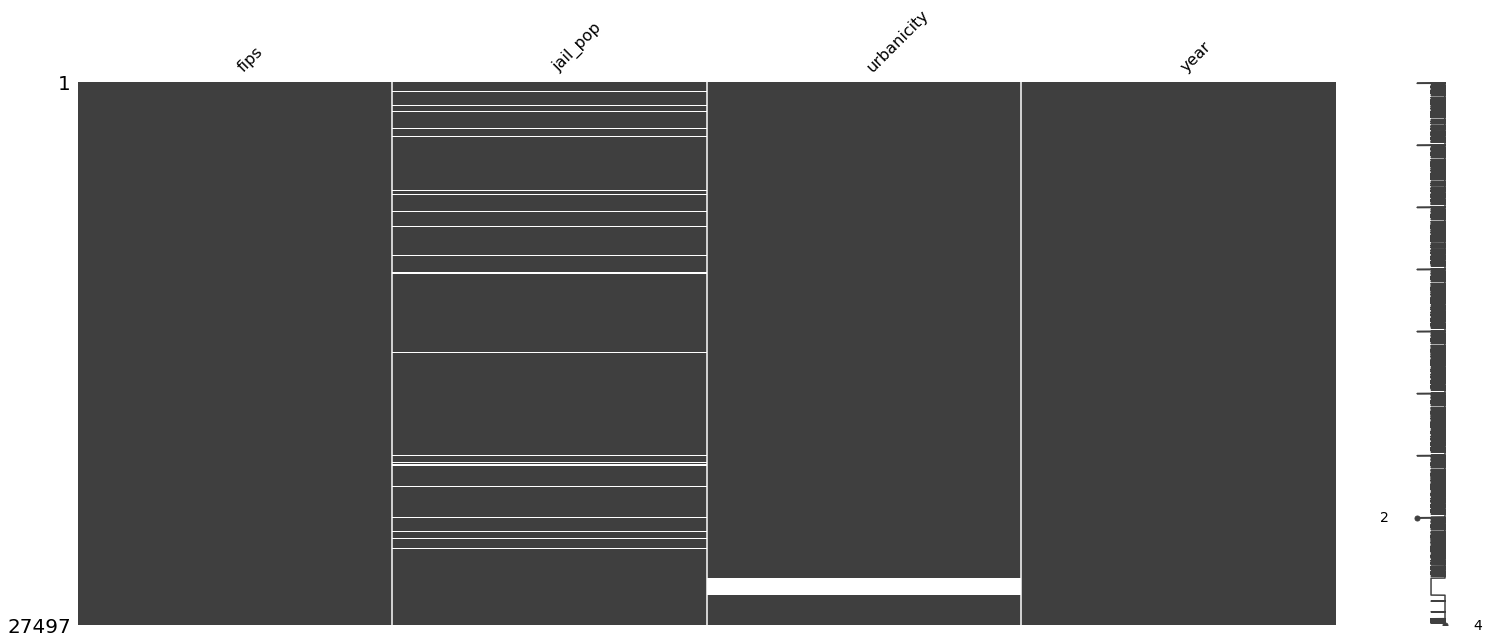

In [76]:
msno.matrix(jaildf);

In [77]:
#jaildf.to_csv('new_jailpop.csv')